In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
 
from torch.utils.data import  DataLoader
from torchvision import models
 
import torchvision.transforms as transforms
import torchvision.datasets as dataset
 
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [4]:
modelVGG = models.vgg16(pretrained=True)
print(modelVGG)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

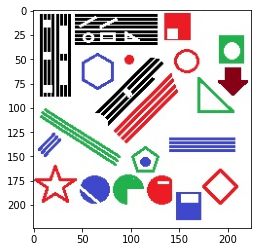

torch.Size([1, 3, 224, 224])


In [22]:
img=cv.imread("/content/edge.jpg")
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
 
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
img=np.array(img)
img=transform(img)
img=img.unsqueeze(0)
print(img.size())

In [23]:
no_of_layers=0
conv_layers=[]
x = modelVGG.children()
print(x)
model_children=list(modelVGG.children())
y = np.array(model_children)
print(y)
for child in model_children:
  if type(child)==nn.Conv2d:
    no_of_layers+=1
    conv_layers.append(child)
  elif type(child)==nn.Sequential:
    for layer in child.children():
      if type(layer)==nn.Conv2d:
        no_of_layers+=1
        conv_layers.append(layer)
print(no_of_layers)

<generator object Module.children at 0x7f4a6c85c0d0>
[Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [36]:
results = [conv_layers[0](img)]
print(results)

for i in range(1, len(conv_layers)):
    results.append(conv_layers[i](results[-1]))
outputs = results

[tensor([[[[-0.3203,  0.1561,  0.1522,  ...,  0.6663,  0.6663,  0.8275],
          [-0.5525,  0.3034,  0.3013,  ...,  0.4436,  0.4436,  0.7417],
          [ 0.2018,  0.6763,  0.6764,  ...,  0.4436,  0.4436,  0.7417],
          ...,
          [-2.2263, -0.6885, -0.5696,  ...,  0.3541,  0.3454,  3.4611],
          [-1.6247, -0.5489, -0.5920,  ...,  0.2728,  0.2570,  3.5118],
          [-0.4719, -0.3819, -0.6692,  ..., -0.6842, -0.7017,  1.7419]],

         [[-1.1230,  2.4093,  2.4515,  ...,  1.8804,  1.8804, -3.5622],
          [ 5.6194,  5.7457,  5.7913,  ...,  0.4445,  0.4445, -5.4361],
          [ 1.9169, -1.8360, -1.8620,  ...,  0.4445,  0.4445, -5.4361],
          ...,
          [ 3.1548,  0.3167, -0.3707,  ...,  0.7033,  0.7080,  0.9520],
          [ 4.4950, -2.1395, -1.8499,  ...,  0.4654,  0.4525,  0.7459],
          [-0.3616, -5.4900, -2.5612,  ..., -0.7758, -0.7884, -0.1197]],

         [[ 3.3958,  4.7968,  4.8989,  ..., -4.6174, -4.6174, -8.1993],
          [-1.1938, -2.4715, 

In [38]:
for num_layer in range(len(outputs)):
    plt.figure(figsize=(50, 10))
    layer_viz = outputs[num_layer][0, :, :, :]
    layer_viz = layer_viz.data
    print("Layer ",num_layer+1)
    for i, filter in enumerate(layer_viz):
        if i == 16: 
            break
        plt.subplot(2, 8, i + 1)
        plt.imshow(filter, cmap='gray')
        plt.axis("off")
    plt.show()
    plt.close()

Output hidden; open in https://colab.research.google.com to view.